# Hikes Of Georgia Monthly Fungi & Weather Report

"A data quality and visualization report for local Georgia fungi observations, gathered from the Inaturalist database."
"Included is weather data gathered from the NOAA"

- Report Timeframe: Monthly
- Dataset Source: INaturalist.com
- Dataset source: NOAA.org

Deliverables:
- Overall fungi observation trends.
- Top 10 fungi observed
- Top 5 edible species.
- Top 5 edible species.
- Observation hotspots (heatmap or regional breakdown).


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize list of edible and medicinal fungi database, this is one of the key value-drivers. Longterm storage of database is needed

In [64]:
edible_species = [
    "Cantharellus cibarius",  # Chanterelle
    "Boletus edulis",  # Porcini
    "Pleurotus ostreatus",  # Oyster mushroom
    "Agaricus bisporus",  # Button/Portobello
    "Morchella esculenta",  # Morel
    "Hericium erinaceus",  # Lion's Mane
    "Pleurotus pulmonarius",  # Summer Oyster Mushroom
    "Hericium americanum",  # Bear's Head Tooth
    "Hericium coralloides", # Coral Tooth
    "Cantharellus lateritius",  # Smooth Chanterelle
    "Meripilus sumstinei",  # Black-Staining Polypore
    "Lactarius deliciosus",  # Saffron Milk Cap
    "Craterellus cornucopioides",  # Black Trumpet
    "Hydnum repandum",  # Hedgehog Mushroom
    "Coprinus comatus",  # Shaggy Mane
    "Armillaria mellea",  # Honey Fungus
    "Sparassis crispa",  # Cauliflower Mushroom
    "Tuber melanosporum",  # Black Truffle
    "Clavulina rugosa",  # White Coral Fungus
    "Flammulina velutipes",  # Enoki
    "Russula vesca",  # The Flirt
    "Tricholoma matsutake",  # Matsutake
    "Leccinum scabrum",  # Birch Bolete
    "Suillus luteus",  # Slippery Jack
    "Laetiporus sulphureus",  # Chicken of the Woods
    "Tremella mesenterica",  # Witch's Butter
    "Dacrymyces chrysospermus",  # Orange Jelly Spot
    "Auricularia angiospermarum",  # Wood Ear
    "Cantharellus cinnabarinus",  # Red Chanterelle
    "Baorangia bicolor",  # Two-Colored Bolete
    "Strobilomyces floccopus",  # Old Man of the Woods
    "Lepista nuda",  # Wood Blewits
    "Lactarius indigo",  # Blue Milkcap
    "Auricularia auricula",  # Jelly Ear
    "Craterellus tubaeformis",  # Yellowfoot Chanterelle
    "Ramaria formosa",  # Coral Fungus
    "Hypomyces lactifluorum",  # Lobster Mushroom
    "Cantharellus subalbidus",  # White Chanterelle
    "Hydnum umbilicatum",  # Hedgehog Mushroom
    "Polyozellus multiplex",  # Blue Chanterelle
    "Ramaria botrytis",  # Cauliflower Coral
    "Sparassis spathulata", # Eastern cauliflower mushroom
    "Laetiporus cincinnatus",  # White-Pored Chicken of the Woods
    "Panus conchatus",  # Lilac Oyster Mushroom
    "Xylaria polymorpha",  # Dead Man's Fingers (antimicrobial properties)
    "Ganoderma applanatum",  # Artist's Conk
    "Russula nigricans",  # Blackening Russula
    "Ganoderma tsugae",  # Hemlock Reishi
    "Piptoporus betulinus",  # Birch Bracket Mushroom
    "Agaricus subrufescens",  # Almond Mushroom
    "Calvatia gigantea",  # Giant Puffball
    "Fomitopsis betulina",  # Birch Polypore
    "Hypsizygus tessellatus",  # Beech Mushroom
    "Chroogomphus rutilus",  # Pine Spike
    "Poria cocos",  # Tuckahoe / Hoelen
    "Auricularia auricula-judae",  # Wood Ear Mushroom
    "Fomitopsis pinicola",  # Red Belted Polypore
    "Tremella fuciformis",  # Snow Fungus / White Jelly Mushroom
    "Polyporus umbellatus",  # Umbrella Polypore
    "Phellinus linteus",  # Mesima
    "Agaricus blazei",  # Agaricus Mushroom (Brazilian Mushroom)
    "Inonotus obliquus",  # Chaga
    #"Trametes versicolor",  # Turkey Tail
    "Cordyceps sinensis",  # Caterpillar Fungus
    "Cordyceps militaris",  # Cordyceps
    "Grifola frondosa",  # Maitake
    "Lentinula edodes",  # Shiitake
    "Ganoderma lucidum",  # Reishi
    "Exidia crenata", # American Amber Jelly Fungus
    
]

medicinal_species = [
    "Ganoderma lucidum",  # Reishi
    "Lentinula edodes",  # Shiitake
    "Hericium erinaceus",  # Lion's Mane
    "Grifola frondosa",  # Maitake
    "Cordyceps militaris",  # Cordyceps
    "Cordyceps sinensis",  # Caterpillar Fungus
    "Trametes versicolor",  # Turkey Tail
    "Inonotus obliquus",  # Chaga
    "Agaricus blazei",  # Agaricus Mushroom (Brazilian Mushroom)
    "Phellinus linteus",  # Mesima
    "Polyporus umbellatus",  # Umbrella Polypore
    "Tremella fuciformis",  # Snow Fungus / White Jelly Mushroom
    "Fomitopsis pinicola",  # Red Belted Polypore
    "Auricularia auricula-judae",  # Wood Ear Mushroom
    "Sparassis crispa",  # Cauliflower Mushroom
    "Flammulina velutipes",  # Enoki
    "Poria cocos",  # Tuckahoe / Hoelen
    "Chroogomphus rutilus",  # Pine Spike
    "Lepista nuda",  # Wood Blewit
    "Laetiporus sulphureus",  # Chicken of the Woods (antioxidant properties)
    "Hypsizygus tessellatus",  # Beech Mushroom
    "Tricholoma matsutake",  # Matsutake
    "Fomitopsis betulina",  # Birch Polypore
    "Calvatia gigantea",  # Giant Puffball
    "Coprinus comatus",  # Shaggy Mane
    "Armillaria mellea",  # Honey Fungus
    "Agaricus subrufescens",  # Almond Mushroom
    "Piptoporus betulinus",  # Birch Bracket Mushroom
    "Ganoderma tsugae",  # Hemlock Reishi
    "Craterellus cornucopioides",  # Black Trumpet
    "Russula nigricans",  # Blackening Russula
    "Pleurotus pulmonarius",  # Summer Oyster Mushroom
    "Hericium americanum",  # Bear's Head Tooth
    "Hericium coralloides", # Coral Tooth
    "Cantharellus lateritius",  # Smooth Chanterelle
    "Ganoderma applanatum",  # Artist's Conk
    "Lactarius deliciosus",  # Saffron Milk Cap
    "Tuber melanosporum",  # Black Truffle
    "Xylaria polymorpha",  # Dead Man's Fingers (antimicrobial properties)
    "Schizophyllum commune",  # Split Gill (immune booster)
    "Panus conchatus",  # Lilac Oyster Mushroom
    "Laetiporus cincinnatus",  # White-Pored Chicken of the Woods
    "Gymnopilus junonius",  # Laughing Gym (under research for medical use)
    "Ganoderma curtisii",  # Golden Reishi
    "Ramaria botrytis",  # Cauliflower Coral
]



In [65]:
fungi_data = pd.read_csv('./data/INaturalist observations March 25.csv')
weather_data = pd.read_csv('./data/v2_GA_daily_aggregated_weather_manual_march25.csv')

# Check for data types and missing values
fungi_data.info()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1894 non-null   int64  
 1   uuid                              1894 non-null   object 
 2   observed_on_string                1894 non-null   object 
 3   observed_on                       1894 non-null   object 
 4   time_observed_at                  1844 non-null   object 
 5   time_zone                         1894 non-null   object 
 6   user_id                           1894 non-null   int64  
 7   user_login                        1894 non-null   object 
 8   user_name                         1143 non-null   object 
 9   created_at                        1894 non-null   object 
 10  updated_at                        1894 non-null   object 
 11  quality_grade                     1894 non-null   object 
 12  licens

In [66]:
# Get basic descriptive statistics
fungi_data.describe()

id       user_id  sound_url  num_identification_agreements  \
count  1.894000e+03  1.894000e+03        0.0                    1894.000000   
mean   2.658307e+08  4.531605e+06        NaN                       0.540127   
std    1.307183e+06  3.316636e+06        NaN                       0.911988   
min    2.634925e+08  1.483000e+03        NaN                       0.000000   
25%    2.649522e+08  8.721460e+05        NaN                       0.000000   
50%    2.656011e+08  4.166206e+06        NaN                       0.000000   
75%    2.667794e+08  7.826646e+06        NaN                       1.000000   
max    2.690957e+08  9.078721e+06        NaN                      11.000000   

       num_identification_disagreements  oauth_application_id     latitude  \
count                       1894.000000           1488.000000  1894.000000   
mean                           0.022175             24.870968    33.597713   
std                            0.147292            109.624373     0.845015   
min                            0.000000              2.000000    30.699283   
25%                            0.000000              2.000000    33.520797   
50%                            0.000000              3.000000    33.800895   
75%                            0.000000              3.000000    33.958394   
max                            1.000000            843.000000    34.986719   

         longitude  positional_accuracy  private_place_guess  \
count  1894.000000          1456.000000                  0.0   
mean    -83.905983           559.052885                  NaN   
std       0.856892          4345.774914                  NaN   
min     -85.483480             1.000000                  NaN   
25%     -84.374250             5.000000                  NaN   
50%     -84.148995            15.000000                  NaN   
75%     -83.626963            72.250000                  NaN   
max     -80.840843        139720.000000                  NaN   

       private_latitude  private_longitude  public_positional_accuracy  \
count               0.0                0.0                 1474.000000   
mean                NaN                NaN                 2881.512212   
std                 NaN                NaN                 8895.248059   
min                 NaN                NaN                    1.000000   
25%                 NaN                NaN                    5.000000   
50%                 NaN                NaN                   18.000000   
75%                 NaN                NaN                  169.500000   
max                 NaN                NaN               139720.000000   

           taxon_id  
count  1.894000e+03  
mean   3.511623e+05  
std    3.878063e+05  
min    4.716700e+04  
25%    5.474300e+04  
50%    1.968420e+05  
75%    4.630710e+05  
max    1.613782e+06

In [67]:
# get first 5 rows of data
fungi_data.sample(5)

id                                  uuid  \
1358  266585052  b6976f86-7209-4808-b32c-75d8f26c8cb1   
131   263922296  822f2e39-aad8-4508-b8be-55bafbf807ca   
1531  267107670  bfe2a993-160e-40c5-aa9f-e6e5a777cab9   
592   265103532  ce7f0830-3515-4d90-aa6b-d5370178ab3e   
1700  267775272  5bd00548-0668-4bed-9070-eca20bb5e289   

             observed_on_string observed_on         time_observed_at  \
1358  2025-03-22 09:00:40-04:00  2025-03-22  2025-03-22 13:00:40 UTC   
131   2025-03-04 15:58:08-05:00  2025-03-04  2025-03-04 20:58:08 UTC   
1531  2025-03-26 13:45:59-04:00  2025-03-26  2025-03-26 17:45:59 UTC   
592   2025-03-12 18:48:05-04:00  2025-03-12  2025-03-12 22:48:05 UTC   
1700  2025-03-30 11:45:04-04:00  2025-03-30  2025-03-30 15:45:04 UTC   

                       time_zone  user_id      user_login          user_name  \
1358  Eastern Time (US & Canada)  5841790      kaetirenee                NaN   
131   Eastern Time (US & Canada)   764155        whatch11          Wes Hatch   
1531  Eastern Time (US & Canada)  8980498  caitlynmarie16                NaN   
592   Eastern Time (US & Canada)  8977908      teatownley  Helen Shackelford   
1700  Eastern Time (US & Canada)  3646925        embirder                NaN   

                   created_at  ... coordinates_obscured positioning_method  \
1358  2025-03-23 16:19:53 UTC  ...                False                NaN   
131   2025-03-04 23:35:42 UTC  ...                False                NaN   
1531  2025-03-26 21:26:33 UTC  ...                False                NaN   
592   2025-03-12 22:49:19 UTC  ...                False                NaN   
1700  2025-03-30 20:16:42 UTC  ...                False                NaN   

     positioning_device      place_town_name place_county_name  \
1358                NaN                  NaN             Rabun   
131                 NaN                  NaN            Fulton   
1531                NaN                  NaN          Cherokee   
592                 NaN  Greater Chattanooga            Walker   
1700                NaN                  NaN            Walker   

                           species_guess     scientific_name  \
1358             violet-toothed polypore  Trichaptum biforme   
131                                  NaN  Tubakia suttoniana   
1531                                 NaN          Parmotrema   
592              violet-toothed polypore  Trichaptum biforme   
1700  Common Gilled Mushrooms and Allies          Agaricales   

                             common_name  iconic_taxon_name  taxon_id  
1358             violet-toothed polypore              Fungi    125705  
131                                  NaN              Fungi    714685  
1531                      Ruffle Lichens              Fungi    117867  
592              violet-toothed polypore              Fungi    125705  
1700  Common Gilled Mushrooms and Allies              Fungi     47167  

[5 rows x 42 columns]

# Data Processing and Cleaning

In [68]:
# Convert date columns to datetime
fungi_data['observed_on'] = pd.to_datetime(fungi_data['observed_on'])

# Keeping only the columns relevant for analysis and visualization
columns_to_keep = ['observed_on', 'latitude', 'longitude','scientific_name', 
                   'common_name', 'num_identification_agreements', 'num_identification_disagreements']
data_cleaned = fungi_data[columns_to_keep].copy()


In [69]:
# Define a function to classify edibility
edibility_map = {species: 'edible' for species in edible_species}
edibility_map.update({species: 'medicinal' for species in medicinal_species})
data_cleaned['edibility'] = data_cleaned['scientific_name'].map(edibility_map).fillna('unknown')


# Check the distribution of the edibility column
print(data_cleaned['edibility'].value_counts())

# Check for missing values in the cleaned data
missing_values = data_cleaned.isnull().sum()
print("\n\nMissing values in cleaned data:\n", missing_values)


edibility
unknown      1725
medicinal     100
edible         69
Name: count, dtype: int64


Missing values in cleaned data:
 observed_on                           0
latitude                              0
longitude                             0
scientific_name                       0
common_name                         323
num_identification_agreements         0
num_identification_disagreements      0
edibility                             0
dtype: int64


In [70]:
# print null values in the cleaned data for common_name
print(len(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].unique()))
print(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].unique())

# check the top 5 species with missing common names and their counts
print(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].value_counts().head(10))

119
['Hesperomyces harmoniae' 'Ganoderma sessile' 'Stereum lobatum'
 'Trametes aesculi' 'Coleosporium' 'Lycoperdon' 'Arthoniales'
 'Ascodichaena rugosa' 'Trapelia placodioides' 'Byssocorticium atrovirens'
 'Monoblastiaceae' 'Boeremia hedericola' 'Mycosphaerellales'
 'Tubakia suttoniana' 'Phaeotremella frondosa' 'Trametes'
 'Gymnosporangium effusum' 'Xanthocarpia' 'Canoparmelia' 'Trichaptum'
 'Mycetinis' 'Stereum fasciatum' 'Neofavolus' 'Pleurotus ostreatus'
 'Hypoxylaceae' 'Stereum' 'Heimiomyces tenuipes' 'Byssocorticium'
 'Ganoderma lobatum' 'Usnea endochrysea' 'Hypoxylon' 'Gymnopus'
 'Hymenochaetaceae' 'Typhrasa' 'Ophiocordyceps kimflemingiae' 'Exidia'
 'Xylobolus subpileatus' 'Steccherinum' 'Pluteus' 'Byssomerulius'
 'Dacrymyces' 'Tremella' 'Fomes fasciatus' 'Cronartium'
 'Botryobasidium aureum' 'Peniophorella' 'Physisporinus crocatus'
 'Mycena overholtsii' 'Delicatula integrella' 'Hydropisphaera peziza'
 'Asteroma impressum' 'Trichoderma peltatum' 'Tyromyces galactinus'
 'Resupinat

# Assesment:
The species without common names are unremarkable given the have little impact on the overall quality of the visualization process.
Two reasons for still continuing with the common names even though there are species with missing common names:
- the mushrooms on the list are neither touted as medicinal or edible
- their observation counts are small enough to not have a major influence on visualization quality

The biggest concern was with (Pleurotus ostreatus, the oyster mushroom), this is a delicious edible and should be updated appropriately for accurate visualization

In [71]:
print(data_cleaned[data_cleaned['scientific_name'] == "Pleurotus ostreatus"]['common_name'].unique())

[nan 'Oyster Mushroom']


Fill Missing Common Names with a "Smart Guess"
- If the dataset contains repeated occurrences of species, we can infer the common_name using the most frequent entry:

In [72]:
# Find the most common name for each scientific name
common_name_mapping = data_cleaned.groupby('scientific_name')['common_name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Apply this mapping to fill missing values
data_cleaned['common_name'] = data_cleaned['common_name'].fillna(data_cleaned['scientific_name'].map(common_name_mapping))

In [73]:
# print null values in the cleaned data for common_name
print(len(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].unique()))
print(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].unique())

# check the top 5 species with missing common names and their counts
print(data_cleaned[data_cleaned['common_name'].isnull()]['scientific_name'].value_counts().head(10))

114
['Hesperomyces harmoniae' 'Ganoderma sessile' 'Stereum lobatum'
 'Trametes aesculi' 'Coleosporium' 'Lycoperdon' 'Arthoniales'
 'Ascodichaena rugosa' 'Trapelia placodioides' 'Byssocorticium atrovirens'
 'Monoblastiaceae' 'Boeremia hedericola' 'Mycosphaerellales'
 'Tubakia suttoniana' 'Phaeotremella frondosa' 'Trametes'
 'Gymnosporangium effusum' 'Xanthocarpia' 'Canoparmelia' 'Trichaptum'
 'Mycetinis' 'Stereum fasciatum' 'Neofavolus' 'Hypoxylaceae' 'Stereum'
 'Heimiomyces tenuipes' 'Byssocorticium' 'Ganoderma lobatum'
 'Usnea endochrysea' 'Hypoxylon' 'Gymnopus' 'Hymenochaetaceae' 'Typhrasa'
 'Ophiocordyceps kimflemingiae' 'Exidia' 'Xylobolus subpileatus'
 'Steccherinum' 'Byssomerulius' 'Dacrymyces' 'Tremella' 'Fomes fasciatus'
 'Cronartium' 'Botryobasidium aureum' 'Peniophorella'
 'Physisporinus crocatus' 'Mycena overholtsii' 'Delicatula integrella'
 'Hydropisphaera peziza' 'Asteroma impressum' 'Trichoderma peltatum'
 'Tyromyces galactinus' 'Resupinatus alboniger' 'Ionomidotis irregu

# Time to add weather data

In [74]:
# import weather data and add to cleaned data
weather_data['Date'] = pd.to_datetime(weather_data['Date']) 

# Merge the cleaned fungi data with the weather data on the Date column
data_merged = pd.merge(data_cleaned, weather_data, left_on='observed_on', right_on='Date', how='left')

# Check for missing values in the merged data
missing_values_merged = data_merged.isnull().sum()  

print("\n\nMissing values in merged data:\n", missing_values_merged)

# Check the first few rows of the merged data
print(data_merged.head())



Missing values in merged data:
 observed_on                           0
latitude                              0
longitude                             0
scientific_name                       0
common_name                         294
num_identification_agreements         0
num_identification_disagreements      0
edibility                             0
Date                                  0
Avg Temp                              0
Precipitation                         0
dtype: int64
  observed_on   latitude  longitude       scientific_name  \
0  2025-03-01  33.782128 -84.261720  Byssomerulius corium   
1  2025-03-01  33.782142 -84.261763   Trametes versicolor   
2  2025-03-01  33.781988 -84.261925           Physciaceae   
3  2025-03-01  30.794893 -81.657633   Clathrus columnatus   
4  2025-03-01  34.102113 -84.386585      Trametes gibbosa   

                                  common_name  num_identification_agreements  \
0                                Netted Crust                     

# Initialize current month and year

In [75]:
from datetime import datetime

# Get former month for this year since the report is created for the previous month
# formatted_date = datetime.now().strftime("%B %Y")


# monthDate = formatted_date
monthDate = "March 2025"

# Monthly Fungi Summary
# Count Observations and Unique Species
Counting the total observations and the number of unique fungi species. This can give us an idea of the dataset's diversity.

Category  Count
0        Total Observations   1894
1      Total Unique Species    466
2     Unique Edible Species     10
3  Unique Medicinal Species      9

C:\Users\Darling\AppData\Local\Temp\ipykernel_18076\1153164170.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Count", y="Category", palette="viridis")


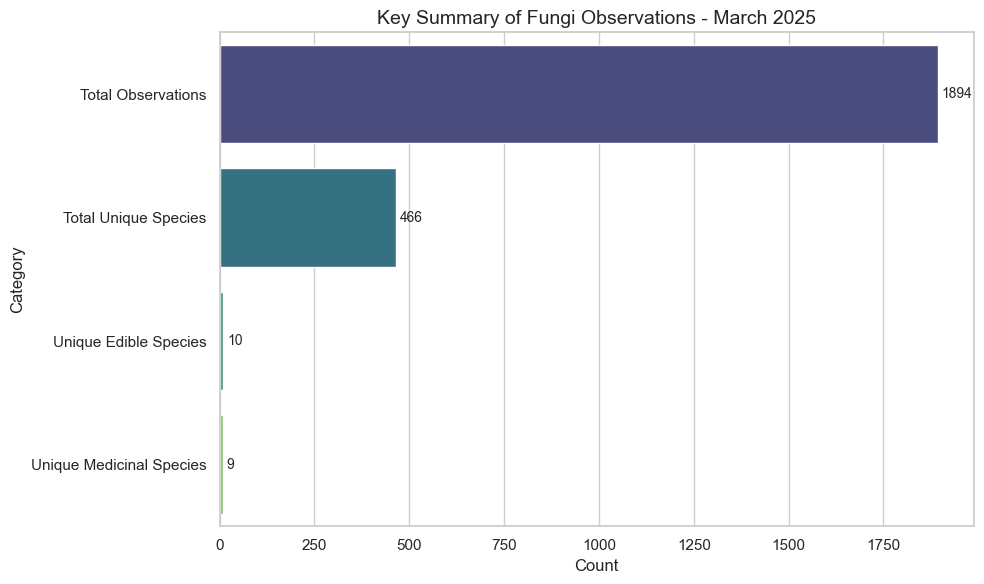

In [76]:
# using seaborn visualize the distribution of Total observations: Total unique Species:, Number of unique edible species:, and Number of unique medicinal species:
# Data for the visualization
summary_data = {
    "Category": [
        "Total Observations", 
        "Total Unique Species", 
        "Unique Edible Species", 
        "Unique Medicinal Species"
    ],
    "Count": [
        len(data_cleaned),  # Total observations
        data_cleaned['scientific_name'].nunique(),  # Total unique species
        data_cleaned[data_cleaned['scientific_name'].isin(edible_species)]['scientific_name'].nunique(),  # Unique edible species
        #data_cleaned[data_cleaned['edibility'] == 'medicinal']['scientific_name'].nunique()  # Unique medicinal species
        data_cleaned[data_cleaned['scientific_name'].isin(medicinal_species)]['scientific_name'].nunique()  # Unique medicinal species
    ]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)
display(summary_df)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Count", y="Category", palette="viridis")

# Add labels and title
plt.title("Key Summary of Fungi Observations - "+monthDate, fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)

# Annotate the bars with their values
for index, value in enumerate(summary_df["Count"]):
    plt.text(value + 10, index, str(value), va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()




# Temporal Analysis - Observations Over Time
By plotting the number of fungi observations over time, this will help us understand if there are any trends or spikes in fungi activity over the observation period. Additionally, adding the weather data will give us enhnaced insights into fruiting conditions

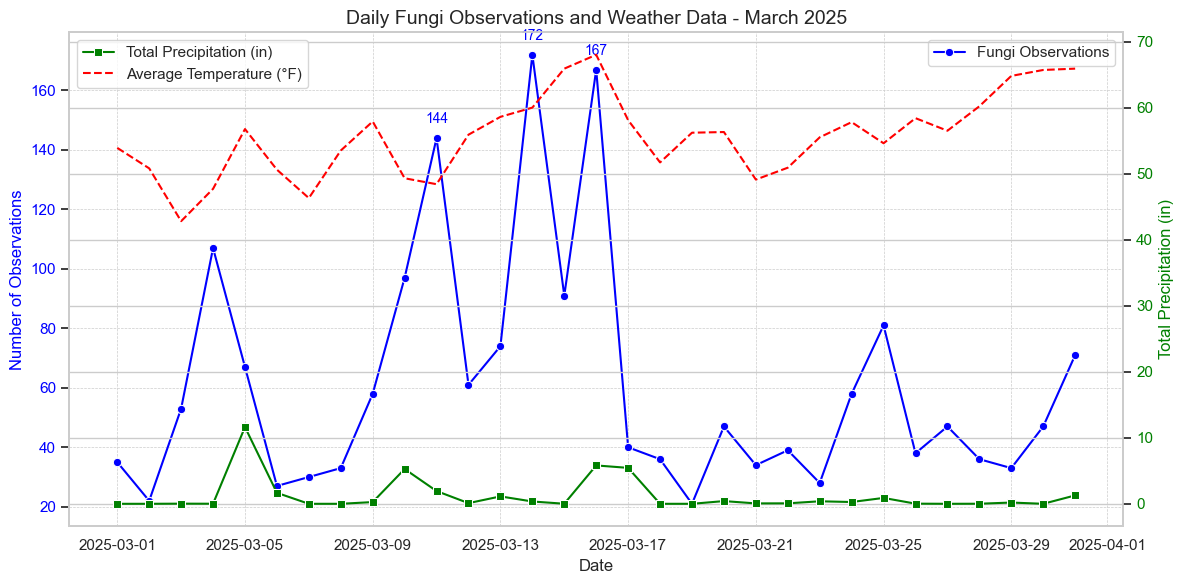

Correlation between Fungi Observations and Total Precipitation: 0.30
Correlation between Fungi Observations and Average Temperature: 0.21


In [77]:
# Ensure the weather data is merged with fungi data
data_merged['observed_on'] = pd.to_datetime(data_merged['observed_on'])
data_merged = data_merged.sort_values(by='observed_on')

# Aggregate data by date for visualization
daily_data = data_merged.groupby('observed_on').agg({
    'scientific_name': 'count',  # Count of fungi observations
    'Precipitation': 'mean',  # Total precipitation
    'Avg Temp': 'mean'  # Average temperature
}).reset_index()

# Rename columns for clarity
daily_data.rename(columns={
    'scientific_name': 'Fungi Observations',
    'Precipitation': 'Total Precipitation',
    'Avg Temp': 'Average Temperature'
}, inplace=True)

# Calculate correlations
correlation_precip = daily_data['Fungi Observations'].corr(daily_data['Total Precipitation'])
correlation_temp = daily_data['Fungi Observations'].corr(daily_data['Average Temperature'])

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot fungi observations on the primary y-axis
sns.lineplot(
    data=daily_data, x='observed_on', y='Fungi Observations', 
    ax=ax1, label='Fungi Observations', color='blue', marker='o'
)
ax1.set_ylabel('Number of Observations', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add annotations for peaks in fungi observations
for x, y in zip(daily_data['observed_on'], daily_data['Fungi Observations']):
    if y > daily_data['Fungi Observations'].quantile(0.9):  # Annotate top 10% peaks
        ax1.text(x, y + 5, f'{y}', color='blue', fontsize=10, ha='center')

# Create a secondary y-axis for weather data
ax2 = ax1.twinx()

# Plot total precipitation on the secondary y-axis
sns.lineplot(
    data=daily_data, x='observed_on', y='Total Precipitation', 
    ax=ax2, label='Total Precipitation (in)', color='green', marker='s'
)
ax2.set_ylabel('Total Precipitation (in)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Optionally, add average temperature as another line
sns.lineplot(
    data=daily_data, x='observed_on', y='Average Temperature', 
    ax=ax2, label='Average Temperature (°F)', color='red', linestyle='--'
)

# Add titles and labels
plt.title('Daily Fungi Observations and Weather Data - '+monthDate, fontsize=14)
ax1.set_xlabel('Date', fontsize=12)

# Add a legend
#fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=10)

# Add gridlines
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print correlation analysis
print(f"Correlation between Fungi Observations and Total Precipitation: {correlation_precip:.2f}")
print(f"Correlation between Fungi Observations and Average Temperature: {correlation_temp:.2f}")

# Top 5 Edible Species:

                   common_name  Number of Observations
0  American Amber Jelly Fungus                      40
1              Oyster Mushroom                      12
2            Orange Jelly Spot                       9
3               witch's butter                       8
4           dead man's fingers                       2


C:\Users\Darling\AppData\Local\Temp\ipykernel_18076\544375380.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


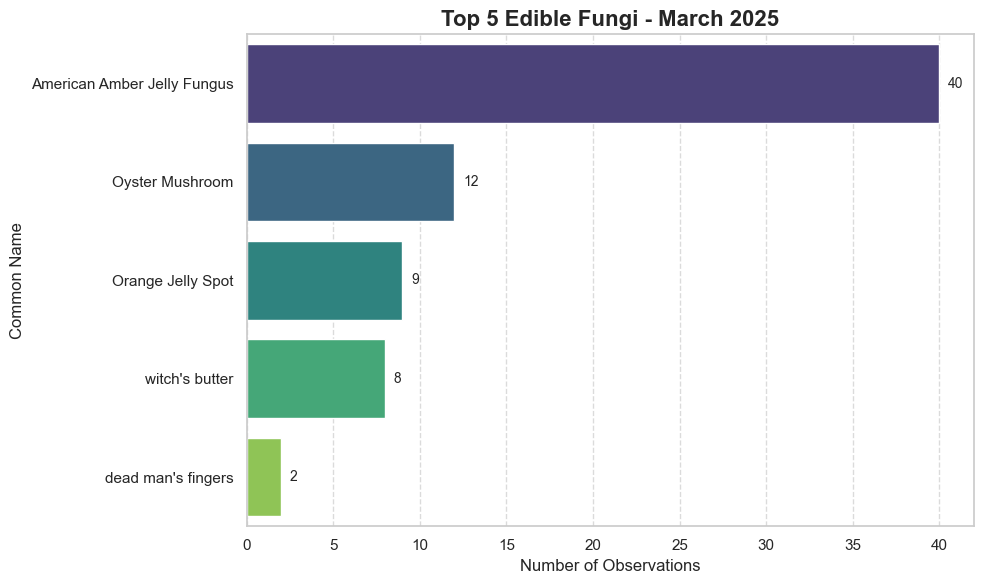

In [104]:

# Filter the top 5 edible species
top_5_edible = (
    data_merged[data_merged['scientific_name'].isin(edible_species)]
    .groupby('common_name')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='Number of Observations')
)

print(top_5_edible)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_edible,
    x='Number of Observations',
    y='common_name',
    palette='viridis'
)

# Add annotations to the bars
for index, value in enumerate(top_5_edible['Number of Observations']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Add labels and title
plt.title('Top 5 Edible Fungi - '+monthDate, fontsize=16, fontweight='bold')
plt.xlabel('Number of Observations', fontsize=12)
plt.ylabel('Common Name', fontsize=12)

# Enhance the gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Darling\AppData\Local\Temp\ipykernel_18076\2305432515.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


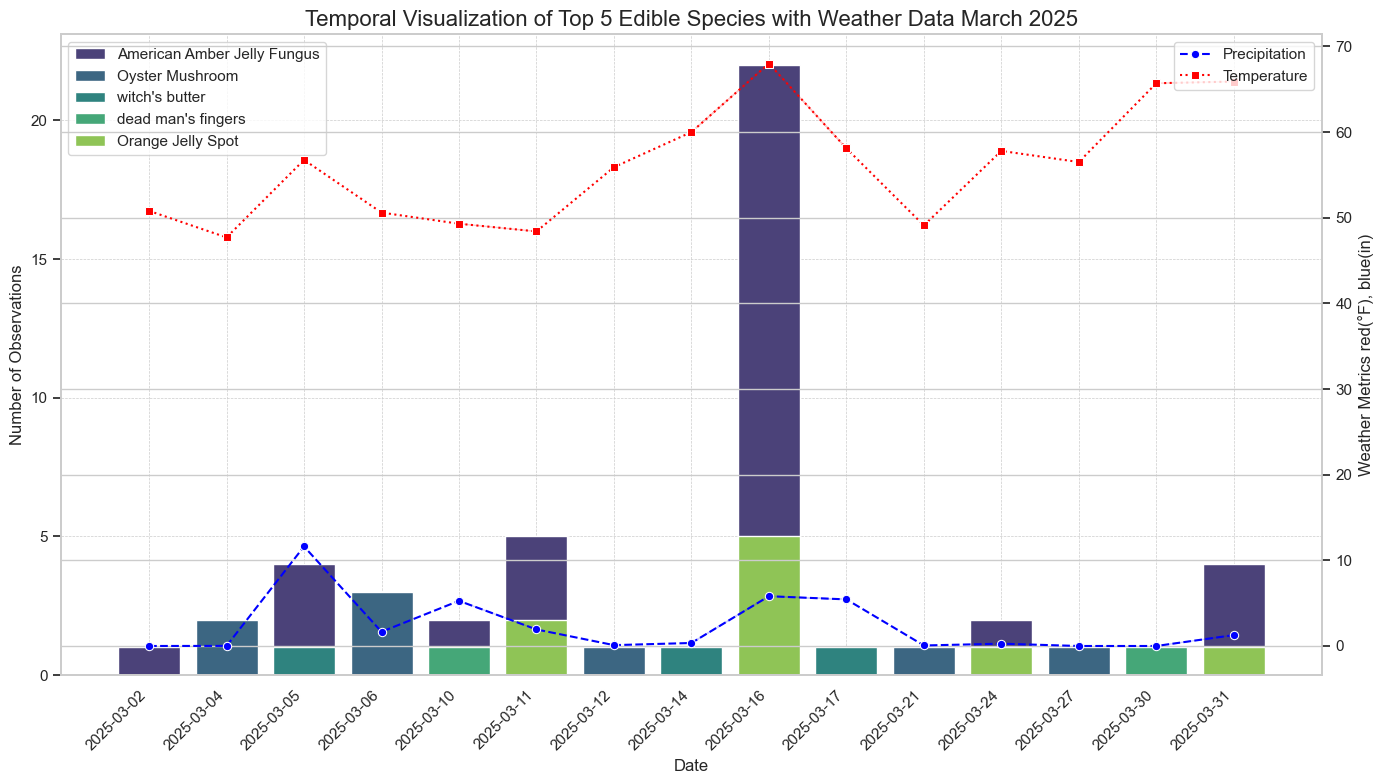

Correlation between Number of Observations and Total Precipitation: 0.19
Correlation between Number of Observations and Average Temperature: 0.30


In [108]:
# Filter the data for the top 5 edible species
top_5_edible_species = top_5_edible['common_name'].tolist()
temporal_data_edible = data_merged[data_merged['common_name'].isin(top_5_edible_species)]

# Aggregate data by observed_on and common_name
temporal_data_edible = temporal_data_edible.groupby(['observed_on', 'common_name']).agg({
    'Precipitation': 'mean',
    'Avg Temp': 'mean',
    'scientific_name': 'count'  # Count of observations
}).reset_index()

# Ensure 'observed_on' is a datetime type and sort the data by 'observed_on'
temporal_data_edible['observed_on'] = pd.to_datetime(temporal_data_edible['observed_on'], errors='coerce')
temporal_data_edible = temporal_data_edible.sort_values(by='observed_on')

# Convert 'observed_on' to string format for categorical plotting
temporal_data_edible['observed_on'] = temporal_data_edible['observed_on'].dt.strftime('%Y-%m-%d')

# Rename columns for clarity
temporal_data_edible.rename(columns={
    'scientific_name': 'Number of Observations',
    'Precipitation': 'Total Precipitation',
    'Avg Temp': 'Average Temperature'
}, inplace=True)

# Calculate correlation between observations and weather data
correlation_precip = temporal_data_edible['Number of Observations'].corr(temporal_data_edible['Total Precipitation'])
correlation_temp = temporal_data_edible['Number of Observations'].corr(temporal_data_edible['Average Temperature'])   

# Plot the data with observations as bar plots and weather data as line plots
plt.figure(figsize=(14, 8))

# Create bar plot for observations
ax1 = sns.barplot(
    data=temporal_data_edible,
    x='observed_on',
    y='Number of Observations',
    hue='common_name',
    dodge=False,
    palette='viridis'
)
ax1.set_ylabel('Number of Observations', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_title('Temporal Visualization of Top 5 Edible Species with Weather Data '+monthDate, fontsize=16)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')

# Create a secondary y-axis for weather data
ax2 = ax1.twinx()

# Plot total precipitation as a line plot
sns.lineplot(
    data=temporal_data_edible,
    x='observed_on',
    y='Total Precipitation',
    ax=ax2,
    color='blue',
    label='Precipitation',
    linestyle='--',
    marker='o'
)

# Plot average temperature as another line plot
sns.lineplot(
    data=temporal_data_edible,
    x='observed_on',
    y='Average Temperature',
    ax=ax2,
    color='red',
    label='Temperature',
    linestyle=':',
    marker='s'
)

# Customize the secondary y-axis
ax2.set_ylabel('Weather Metrics red(°F), blue(in)', fontsize=12)
ax2.legend(loc='upper right')

# Add gridlines for better readability
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Improve layout
plt.tight_layout()
plt.show()

print(f"Correlation between Number of Observations and Total Precipitation: {correlation_precip:.2f}")
print(f"Correlation between Number of Observations and Average Temperature: {correlation_temp:.2f}")

This visualization provides a clear temporal view of the top 5 edible fungi species' observations alongside weather metrics (precipitation and temperature). However, the low correlation metrics suggest that the relationship between weather conditions and fungi observations may not be strongly linear or direct. Explanation for foragers or nature enthusiasts:

Key Insights for Foragers and Nature Enthusiasts:
Observation Peaks:
- The graph highlights specific dates where certain fungi species, such as the "American Amber Jelly Fungus," were observed in higher numbers. These peaks can guide foragers on when these species are more likely to appear.

Weather Context:
- While precipitation and temperature are included, their weak correlation with fungi observations suggests that other factors (e.g., soil conditions, humidity, or microclimates) might play a more significant role in fungi growth.Foragers should not rely solely on general weather trends but also consider local environmental conditions.

Species-Specific Trends:
- Different species exhibit unique patterns. For example, some species may thrive after rainfall, while others might not show a clear dependency on precipitation or temperature. This highlights the importance of species-specific knowledge.

# Top 5 Medicinal Species

            common_name  Number of Observations
0           turkey-tail                      75
1    splitgill mushroom                      13
2         golden reishi                       4
3    dead man's fingers                       2
4  lion's-mane mushroom                       2


C:\Users\Darling\AppData\Local\Temp\ipykernel_18076\433583690.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


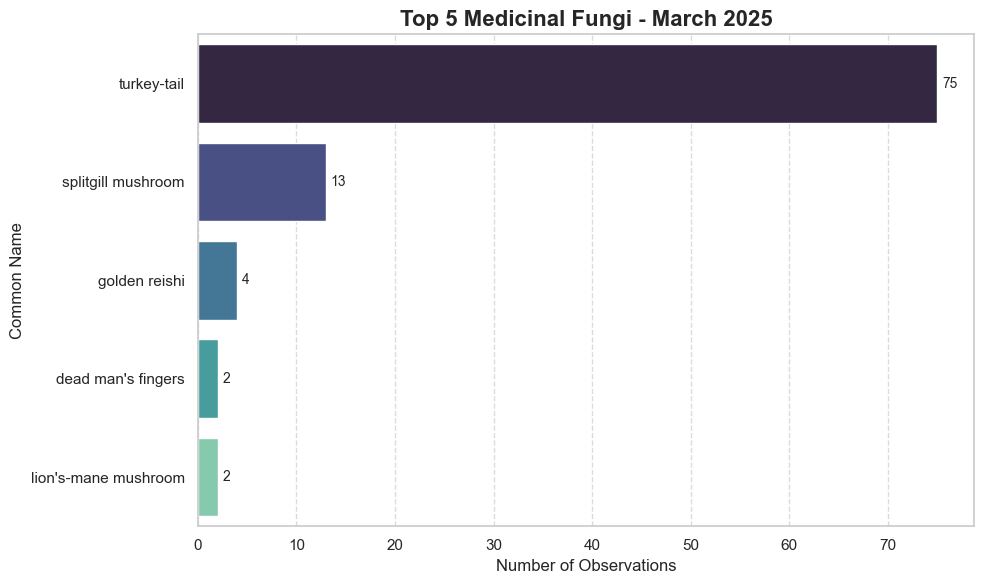

In [80]:
# Filter the top 5 edible species
top_5_medicinal = (
    data_merged[data_merged['scientific_name'].isin(medicinal_species)]
    .groupby('common_name')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='Number of Observations')
)

print(top_5_medicinal)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_medicinal,
    x='Number of Observations',
    y='common_name',
    palette='mako'
)

# Add annotations to the bars
for index, value in enumerate(top_5_medicinal['Number of Observations']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Add labels and title
plt.title('Top 5 Medicinal Fungi - '+monthDate, fontsize=16, fontweight='bold')
plt.xlabel('Number of Observations', fontsize=12)
plt.ylabel('Common Name', fontsize=12)

# Enhance the gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Darling\AppData\Local\Temp\ipykernel_18076\2283276112.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


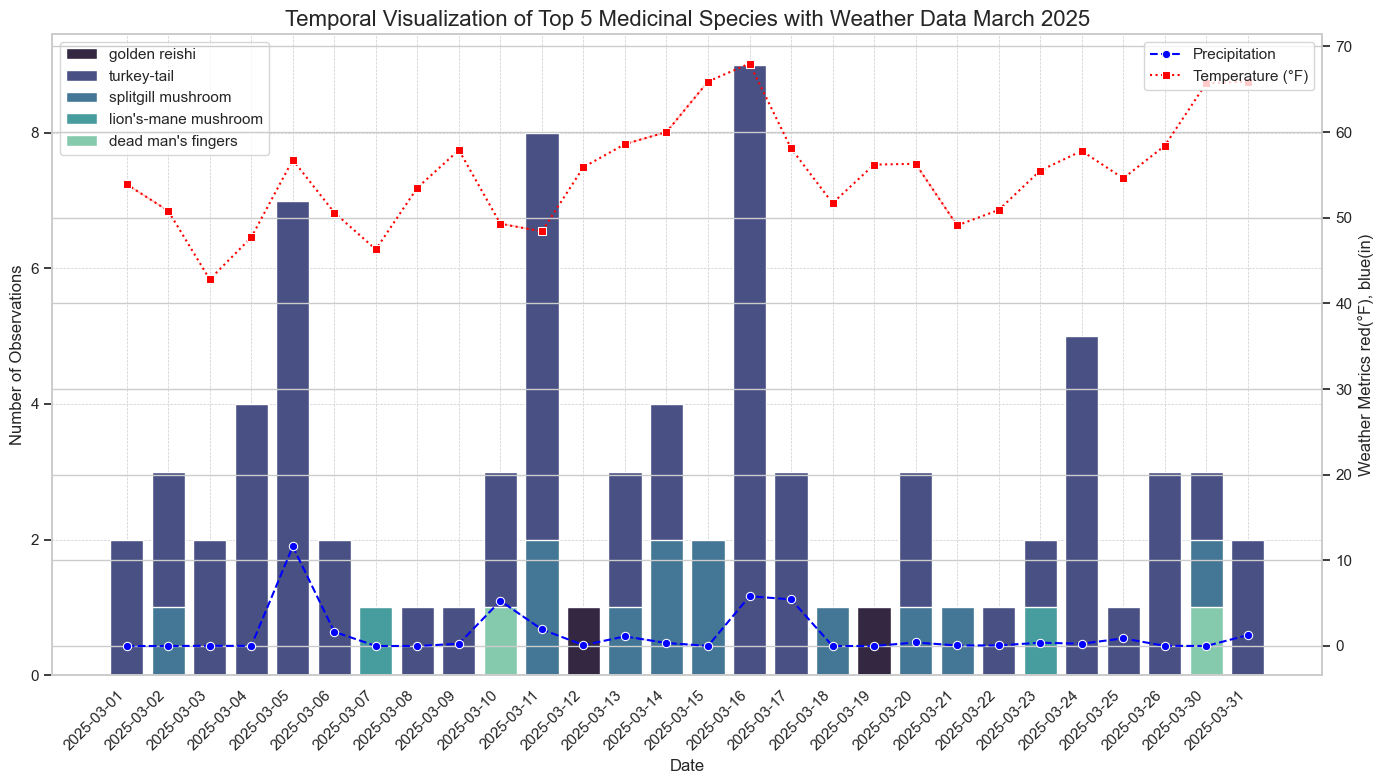

Correlation between Number of Observations and Total Precipitation: 0.56
Correlation between Number of Observations and Average Temperature: 0.13


In [107]:
# Filter the data for the top 5 medicinal species
top_5_medicinal_species = top_5_medicinal['common_name'].tolist()
temporal_data_medicinal = data_merged[data_merged['common_name'].isin(top_5_medicinal_species)]

# Aggregate data by observed_on and common_name
temporal_data_medicinal = temporal_data_medicinal.groupby(['observed_on', 'common_name']).agg({
    'Precipitation': 'mean',
    'Avg Temp': 'mean',
    'scientific_name': 'count'  # Count of observations
}).reset_index()

# Ensure 'observed_on' is a datetime type and sort the data by 'observed_on'
temporal_data_medicinal['observed_on'] = pd.to_datetime(temporal_data_medicinal['observed_on'], errors='coerce')
temporal_data_medicinal = temporal_data_medicinal.sort_values(by='observed_on')

# Convert 'observed_on' to string format for categorical plotting
temporal_data_medicinal['observed_on'] = temporal_data_medicinal['observed_on'].dt.strftime('%Y-%m-%d')

# Rename columns for clarity
temporal_data_medicinal.rename(columns={
    'scientific_name': 'Number of Observations',
    'Precipitation': 'Total Precipitation',
    'Avg Temp': 'Average Temperature'
}, inplace=True)

# Calculate correlation between observations and weather data
correlation_precip = temporal_data_medicinal['Number of Observations'].corr(temporal_data_medicinal['Total Precipitation'])
correlation_temp = temporal_data_medicinal['Number of Observations'].corr(temporal_data_medicinal['Average Temperature'])   

# Plot the data with observations as bar plots and weather data as line plots
plt.figure(figsize=(14, 8))

# Create bar plot for observations
ax1 = sns.barplot(
    data=temporal_data_medicinal,
    x='observed_on',
    y='Number of Observations',
    hue='common_name',
    dodge=False,
    palette='mako'
)
ax1.set_ylabel('Number of Observations', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_title('Temporal Visualization of Top 5 Medicinal Species with Weather Data '+monthDate, fontsize=16)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax1.legend(loc='upper left')

# Create a secondary y-axis for weather data
ax2 = ax1.twinx()

# Plot total precipitation as a line plot
sns.lineplot(
    data=temporal_data_medicinal,
    x='observed_on',
    y='Total Precipitation',
    ax=ax2,
    color='blue',
    label='Precipitation',
    linestyle='--',
    marker='o'
)

# Plot average temperature as another line plot
sns.lineplot(
    data=temporal_data_medicinal,
    x='observed_on',
    y='Average Temperature',
    ax=ax2,
    color='red',
    label='Temperature (°F)',
    linestyle=':',
    marker='s'
)

# Customize the secondary y-axis
ax2.set_ylabel('Weather Metrics red(°F), blue(in)', fontsize=12)
ax2.legend(loc='upper right')

# Add gridlines for better readability
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Improve layout
plt.tight_layout()
plt.show()

print(f"Correlation between Number of Observations and Total Precipitation: {correlation_precip:.2f}")
print(f"Correlation between Number of Observations and Average Temperature: {correlation_temp:.2f}")

# Assesment
This visualization provides valuable insights into the temporal trends of medicinal fungi observations and their relationship with weather conditions. While precipitation appears to have a stronger influence, temperature alone is not a significant driver. Foragers can use this information to optimize their search for medicinal fungi species.

# Geographic Distribution of Observations
Provide geographic distribution of observations along with color-coded layers for edible, medicinal, and poisonous fungi

In [109]:
import folium
from folium.plugins import MarkerCluster

# Set up the map centered around Georgia
map_center = [32.1656, -82.9001]  # Latitude and longitude for Georgia
m = folium.Map(location=map_center, zoom_start=7)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in data_cleaned.iterrows():
    if 'edible' in row['edibility'] and 'medicinal' in row['edibility']:
        color = 'green'  # Give edible-medicinal priority to edible color
    elif row['edibility'] == 'edible':
        color = 'green'
    elif row['edibility'] == 'medicinal':
        color = 'purple'
    else:
        color = 'blue'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Species: {row['common_name']} ({row['scientific_name']})"
    ).add_to(m)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Add a custom legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; right: 50px; width: 200px; height: 150px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;">
    <b>Legend - GA Fungi Observations March 2025</b><br>
    <i style="background:green; width:10px; height:10px; display:inline-block;"></i> Edible<br>
    <i style="background:purple; width:10px; height:10px; display:inline-block;"></i> Medicinal<br>
    <i style="background:blue; width:10px; height:10px; display:inline-block;"></i> Unknown<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# save map as html file for wordpress upload
m.save("GA_Fungi_Map_March2025.html")

# Display the map
m


# What I learned so far: (4/23/25)

Precipitation alone does not appear to have a strong positive correlation with mushroom fruiting, and this is likely due to several factors, including the granularity of the weather data and the complexity of environmental conditions that influence fungi growth. Let’s break this down:

---

### **1. Granularity of Weather Data**
- **Statewide Weather Data**:
  - The weather data used in your analysis is aggregated at the state level. This means it represents average precipitation and temperature across Georgia, which may not accurately reflect the conditions in specific micro-regions where fungi were observed.
  - Fungi growth is highly localized and depends on microclimates (e.g., forested areas, shaded regions, or areas near water bodies). Statewide averages may dilute the impact of localized rainfall or temperature variations.

- **Micro-Regional Variability**:
  - For example, a forested area with high canopy cover may retain moisture longer after rainfall, creating favorable conditions for fungi growth, even if statewide precipitation levels are low.
  - Conversely, open areas with high evaporation rates may not benefit as much from the same amount of rainfall.

---

### **2. Importance of Other Environmental Factors**
Fungi growth is influenced by a combination of factors, not just precipitation. Here are some key contributors:

#### **a. Humidity**
- High humidity is critical for fungi fruiting because it prevents desiccation of the fruiting bodies.
- Even with sufficient rainfall, low humidity can inhibit fungi growth, especially in exposed areas where moisture evaporates quickly.

#### **b. Soil Conditions**
- **Moisture Retention**:
  - Soil that retains moisture (e.g., loamy or clay-rich soil) provides a stable environment for fungi growth, even during dry spells.
  - Sandy or rocky soil, on the other hand, may drain water too quickly, reducing the availability of moisture for fungi.

- **Nutrient Availability**:
  - Fungi rely on organic matter in the soil for nutrients. Areas with rich, decomposing organic material (e.g., leaf litter in forests) are more conducive to fungi growth than nutrient-poor soils.

#### **c. Microclimates**
- **Temperature Stability**:
  - Shaded areas under dense tree canopies tend to have more stable temperatures and higher humidity, creating ideal conditions for fungi growth.
  - Open areas may experience greater temperature fluctuations, which can stress fungi and inhibit fruiting.

- **Wind Protection**:
  - Microclimates that shield fungi from strong winds help maintain moisture levels, which is essential for fruiting.

---

### **3. Why Precipitation Alone is Insufficient**
- Precipitation provides the initial moisture needed for fungi growth, but it is not the sole determinant. Without the right combination of humidity, soil conditions, and microclimates, the water from rainfall may not be effectively utilized by fungi.
- For example:
  - A heavy rainfall event in a dry, sandy area may not lead to significant fungi growth because the water drains too quickly.
  - Conversely, a light drizzle in a humid, forested area with rich soil may result in abundant fungi fruiting.

---

### **4. Improving the Analysis**
To better understand the relationship between environmental factors and fungi growth, consider the following:
- **Use Localized Weather Data**:
  - Incorporate weather data from stations near observation sites to capture micro-regional variations in precipitation, temperature, and humidity.

- **Include Additional Variables**:
  - Add data on soil type, canopy cover, and proximity to water bodies to account for other environmental factors that influence fungi growth.

- **Analyze Microclimates**:
  - Use geographic information systems (GIS) to map observation sites and overlay environmental data (e.g., forest density, elevation) to identify patterns.

---

### **Conclusion**
The weak correlation between precipitation and fungi observations highlights the complexity of environmental factors that influence fungi growth. While precipitation is important, it must be considered alongside humidity, soil conditions, and microclimates to accurately discern the drivers of mushroom fruiting. Incorporating more localized and detailed environmental data into your analysis will provide deeper insights and improve the accuracy of your findings.